In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# parameter tuning 
from sklearn.model_selection import (cross_val_score, GridSearchCV,StratifiedKFold, ShuffleSplit )
# Feature Selection
from sklearn.feature_selection import (SelectKBest, RFE, RFECV)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from collections import defaultdict
# modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data= pd.read_csv("breastcancer.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})


In [8]:
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']

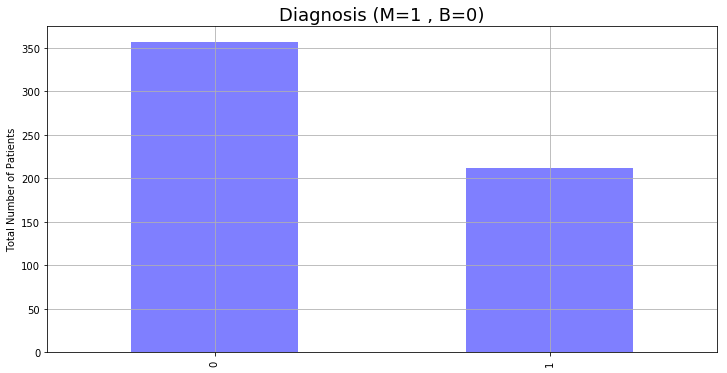

In [9]:
datas.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, facecolor = 'b', figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")
plt.grid(b=True)

In [10]:
data_mean = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

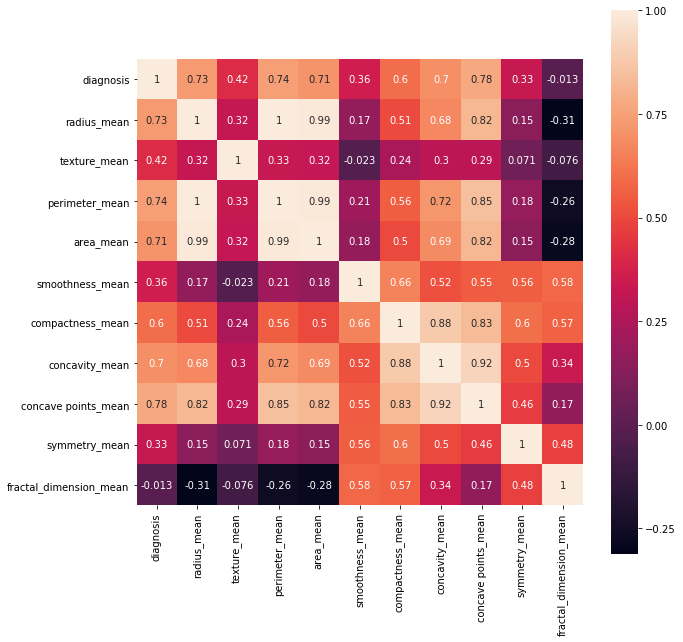

In [11]:
plt.figure(figsize=(10,10))
foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True)

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
predictors = data_mean.columns[2:11]
target = "diagnosis"
X = data_mean.loc[:,predictors]
y = np.ravel(data.loc[:,[target]])
# Split the dataset in train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Shape of training set : %i & Shape of test set : %i' % (X_train.shape[0],X_test.shape[0]) )
print ('There are very few data points so 10-fold cross validation should give us a better estimate')

Shape of training set : 455 & Shape of test set : 114
There are very few data points so 10-fold cross validation should give us a better estimate


In [13]:
param_grid = {
    'n_estimators': [ 25, 50, 100, 150, 300, 500], # the more parameters, the more computational expensive
     "max_depth": [ 5, 8, 15, 25],
    "max_features": ['auto', 'sqrt', 'log2'] 
     }

#use out-of-bag samples ("oob_score= True") to estimate the generalization accuracy.
rfc = RandomForestClassifier(bootstrap= True, n_jobs= 1, oob_score= True)

#let's use cv=10 in the GridSearchCV call
#performance estimation
#initiate the grid 
grid = GridSearchCV(rfc, param_grid = param_grid, cv=10, scoring ='accuracy')
#fit your data before you can get the best parameter combination.
grid.fit(X,y)
grid.cv_results_

C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\click\Anaconda3\envs\virtual_platform\lib\s

{'mean_fit_time': array([ 0.03801155,  0.06572304,  0.13490732,  0.19883611,  0.38224771,
         0.66562462,  0.03818243,  0.07866797,  0.15116074,  0.20205879,
         0.44980564,  0.79109919,  0.03921087,  0.0657207 ,  0.14799719,
         0.20416756,  0.39963915,  0.6432544 ,  0.0339397 ,  0.0664264 ,
         0.13104641,  0.19767604,  0.39078383,  0.6591078 ,  0.0360961 ,
         0.0673341 ,  0.13061626,  0.19713228,  0.39219811,  0.65323708,
         0.03404341,  0.06707945,  0.13244226,  0.19712179,  0.39015229,
         0.66008632,  0.03313711,  0.06602328,  0.13164985,  0.19633064,
         0.39243722,  0.65952759,  0.03419058,  0.06717987,  0.12973979,
         0.19667475,  0.3912276 ,  0.66031098,  0.03399053,  0.06647809,
         0.12998948,  0.19713035,  0.39981511,  0.65295765,  0.03464177,
         0.06526704,  0.13140411,  0.19737492,  0.39364915,  0.65364683,
         0.03314128,  0.06522243,  0.13110664,  0.19587202,  0.39083951,
         0.6514154 ,  0.0340452 , 

In [14]:
# Let's find out the best scores, parameter and the estimator from the gridsearchCV
print("GridSearhCV best model:\n ")
print('The best score: ', grid.best_score_)
print('The best parameter:', grid.best_params_)
print('The best model estimator:', grid.best_estimator_)

GridSearhCV best model:
 
The best score:  0.947275922671
The best parameter: {'n_estimators': 100, 'max_depth': 5, 'max_features': 'auto'}
The best model estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


In [15]:


# model = RandomForestClassifier() with optimal values
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [16]:
print("Performance Accuracy on the Testing data:", round(model.score(X_test, y_test) *100))

Performance Accuracy on the Testing data: 95.0


In [17]:
#getting the predictions for X#getting  
y_pred = model.predict(X_test)
print('Total Predictions {}'.format(len(y_pred)))

Total Predictions 114


In [18]:
truth = pd.DataFrame(y_test, columns= ['Truth'])
predictions = pd.DataFrame(y_pred, columns= ['Predictions'])
frames = [truth, predictions]
_result = pd.concat(frames, axis=1)
print(_result.shape)
_result.head()

(114, 2)


,Truth,Predictions
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [19]:

# 10 fold cross-validation with a Tree classifier on the trainning dataset# 10 fold 
#splitting the data, fitting a model and computing the score 10 consecutive times
cv_scores = []

scores = cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')
cv_scores.append(scores.mean())
cv_scores.append(scores.std())

C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\click\Anaconda3\envs\virtual_platform\lib\s

In [20]:

#cross validation mean score#cross va 
print("10 k-fold cross validation mean score: ", scores.mean() *100)

10 k-fold cross validation mean score:  94.0724637681


In [21]:
# printing classification accuracy score rounded
print("Classification accuracy: ", round(accuracy_score(y_test, y_pred, normalize=True) * 100))

Classification accuracy:  95.0


In [22]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

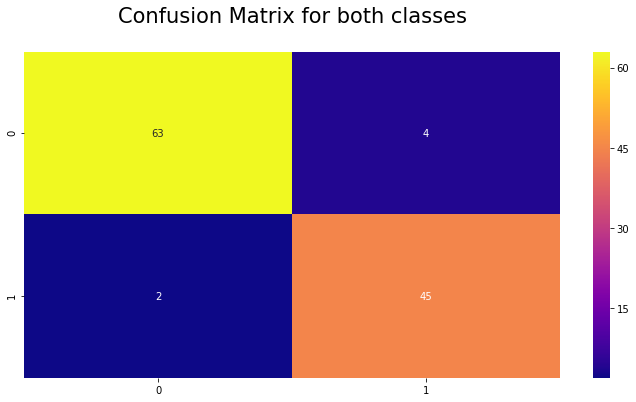

In [23]:
plt.figure(figsize=(12,6))

ax = plt.axes()
ax.set_title('Confusion Matrix for both classes\n', size=21)
sns.heatmap(cm, cmap= 'plasma',annot=True, fmt='g') # cmap
plt.show()

In [24]:
# The classification Report
target_names = ['Benign [Class 0]', 'Malignant[Class 1]']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

  Benign [Class 0]       0.97      0.94      0.95        67
Malignant[Class 1]       0.92      0.96      0.94        47

       avg / total       0.95      0.95      0.95       114



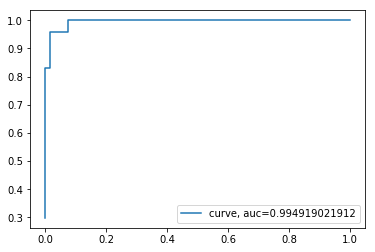

In [25]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="curve, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [29]:
param_grid = {
    'n_estimators': [ 25, 50, 100, 150, 300, 500], # the more parameters, the more computational expensive
     "max_depth": [ 5, 8, 15, 25],
    "max_features": ['auto', 'sqrt', 'log2'] 
     }
gbm = GradientBoostingClassifier(learning_rate=0.1,random_state=10,subsample=0.8)
#performance estimation
#initiate the grid 
grid = GridSearchCV(gbm, param_grid = param_grid, cv=10, scoring ='accuracy')
#fit your data before you can get the best parameter combination.
grid.fit(X,y)
grid.cv_results_

C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\click\Anaconda3\envs\virtual_platform\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn

{'mean_fit_time': array([ 0.03494983,  0.06627471,  0.12813728,  0.18599195,  0.24799919,
         0.33799727,  0.02897744,  0.06652975,  0.12413988,  0.1881336 ,
         0.23819361,  0.29800813,  0.03043046,  0.05891035,  0.11034069,
         0.18427889,  0.221032  ,  0.30923851,  0.06096241,  0.12604637,
         0.20514412,  0.2363739 ,  0.28559666,  0.33619659,  0.06156273,
         0.11972167,  0.2156975 ,  0.21138661,  0.26119628,  0.31739309,
         0.05794506,  0.12085245,  0.19251099,  0.20506291,  0.2632467 ,
         0.31910994,  0.06727653,  0.15261815,  0.25119522,  0.26912684,
         0.30465198,  0.38809872,  0.07574708,  0.15285401,  0.2602922 ,
         0.27513788,  0.29188688,  0.35694766,  0.06843309,  0.14909971,
         0.22379372,  0.23729031,  0.28556411,  0.34478147,  0.06652713,
         0.14558716,  0.23933291,  0.25528142,  0.29443026,  0.35715394,
         0.06782725,  0.1500011 ,  0.22931345,  0.24915528,  0.28485856,
         0.35234025,  0.06879389, 

In [30]:
# Let's find out the best scores, parameter and the estimator from the gridsearchCV
print("GridSearhCV best model:\n ")
print('The best score: ', grid.best_score_)
print('The best parameter:', grid.best_params_)
print('The best model estimator:', grid.best_estimator_)

GridSearhCV best model:
 
The best score:  0.952548330404
The best parameter: {'n_estimators': 150, 'max_depth': 5, 'max_features': 'sqrt'}
The best model estimator: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)


In [31]:
model2 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)
model2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)

In [32]:
print("Performance Accuracy on the Testing data:", round(model2.score(X_test, y_test) *100))

Performance Accuracy on the Testing data: 96.0


In [33]:
#getting the predictions for X#getting  
y_pred2 = model2.predict(X_test)
print('Total Predictions {}'.format(len(y_pred2)))

Total Predictions 114


In [34]:
truth = pd.DataFrame(y_test, columns= ['Truth'])
predictions = pd.DataFrame(y_pred, columns= ['Predictions'])
frames = [truth, predictions]
_result = pd.concat(frames, axis=1)
print(_result.shape)
_result.head()

(114, 2)


,Truth,Predictions
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [40]:
cv_scores = []

scores2 = cross_val_score(gbm, X_train, y_train, cv=10, scoring='accuracy')
cv_scores.append(scores2.mean())
cv_scores.append(scores2.std())

In [41]:
#cross validation mean score#cross va 
print("10 k-fold cross validation mean score: ", scores2.mean() *100)

10 k-fold cross validation mean score:  94.9420289855


In [42]:
# printing classification accuracy score rounded
print("Classification accuracy: ", round(accuracy_score(y_test, y_pred2, normalize=True) * 100))

Classification accuracy:  96.0


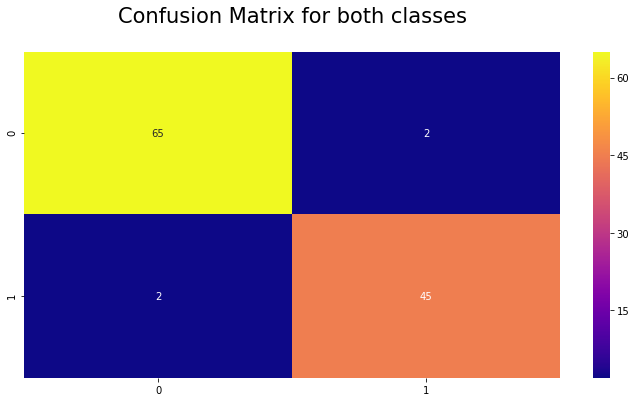

In [43]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(12,6))

ax = plt.axes()
ax.set_title('Confusion Matrix for both classes\n', size=21)
sns.heatmap(cm, cmap= 'plasma',annot=True, fmt='g') # cmap
plt.show()